### Team details
- MD Shaheed Ali
- Birju Shah

In [126]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### STEP 1 : Reading and Understanding the data 

In [127]:
# reading the data set
df = pd.read_csv("telecom_churn_data.csv")

In [128]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [129]:
#Understanding and having a look of the data types of all features
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [130]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

#### There are a total of 226 columns and 99999 rows of enteries

In [131]:
# creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [132]:
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [133]:
# printing the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# checking if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### STEP 2 : Data Analysis and Data Cleaning 

#### Proportion of outgoing vs incoming calls
- Outgoing calls have more minutes of usage than incoming calls.

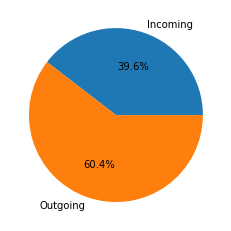

In [134]:
incoming = 0
outgoing = 0
for i in range(6,10):
    incoming += df['total_ic_mou_' + str(i)].sum()
    outgoing += df['total_og_mou_' + str(i)].sum()
plt.pie(x=[incoming,outgoing], labels=['Incoming', 'Outgoing'], autopct='%1.1f%%')
plt.show()

#### 2G vs 3G usage
- 3g usage is considerably higher than 2g usage

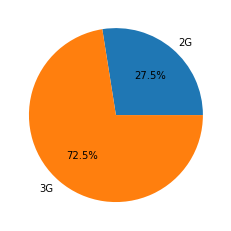

In [135]:
twog = 0
threeg = 0
for i in range(6,10):
    twog += df['vol_2g_mb_' + str(i)].sum()
    threeg += df['vol_3g_mb_' + str(i)].sum()
plt.pie(x=[twog,threeg], labels=['2G', '3G'], autopct='%1.1f%%')
plt.show()

In [136]:
# looking at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [137]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

In [138]:

# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

total_rech_data_6 date_of_last_rech_data_6
1                NaN                      NaN
2                NaN                      NaN
3                NaN                      NaN
5                NaN                      NaN
6                NaN                      NaN

In [139]:
# creating a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [140]:
# imputing missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [141]:
#Checking post imputing whether all values are imputed properly or not 
df[zero_impute].isnull().sum()*100/df.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [142]:
#Summary statistic of the post imputing 
df[zero_impute].describe()


total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count       99999.000000        99999.000000        99999.000000   
mean            0.632806           48.445409           51.393440   
std             1.669040          127.743863          132.629365   
min             0.000000            0.000000            0.000000   
25%             0.000000            0.000000            0.000000   
50%             0.000000            0.000000            0.000000   
75%             1.000000            8.250000           17.000000   
max            84.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  max_rech_data_6  \
count        99999.000000        99999.000000     99999.000000   
mean            52.027022           49.961089        31.792048   
std            131.182609          127.804280        77.248778   
min              0.000000            0.000000         0.000000   
25%              0.000000            0.000000         0.000000   
50%              0.000000            0.000000         0.000000   
75%             23.000000           17.000000         8.000000   
max           4076.000000         4061.000000      1555.000000   

       max_rech_data_7  max_rech_data_8  max_rech_data_9  
count     99999.000000     99999.000000     99999.000000  
mean         32.406314        33.113011        32.387644  
std          78.342435        78.872739        78.818696  
min           0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000  
50%           0.000000         0.000000         0.000000  
75%          14.000000        17.000000        17.000000  
max        1555.000000      1555.000000      1555.000000

In [143]:
#Dropping id columns
df = df.drop(id_cols, axis=1)

#### Last date of months 6 7 8 and 9 are all same so we can drop those columns

In [144]:
df = df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9'], axis=1)

In [145]:
df.shape

(99999, 220)

#### Dropping Volume based cost as the feature is related to postpaid and we are analysing prepaid churn. Also tried to iclude in model but not significant.

In [146]:
df = df.drop(columns=['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g','sep_vbc_3g'], axis=1)

In [147]:
df.shape

(99999, 216)

#### Keeping the last recharge date as number instead of date. Keeping only the date part so we can know what was the day of the month when last recharge was made.

In [148]:
for i in range(6,10):
    df['date_of_last_rech_' + str(i)] = df['date_of_last_rech_' + str(i)].apply(lambda x: int(str(x).split('/')[1]) if len(str(x).split('/')) > 1 else 0)
    df['date_of_last_rech_data_' + str(i)] = df['date_of_last_rech_data_' + str(i)].apply(lambda x: int(str(x).split('/')[1]) if len(str(x).split('/')) > 1 else 0)

In [149]:
df.shape

(99999, 216)

In [150]:
# replacing missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [151]:
df[cat_cols].isnull().sum()*100/df.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

### STEP3: Filtering High Value customers

In [152]:
#Calculating total data recharge Amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [153]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [154]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [155]:
# looking at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [156]:
# retaining only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df = df.reset_index(drop=True)
df.shape

(30001, 221)

In [157]:

# delete variables created to filter high-value customers
df = df.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df.shape

(30001, 216)

#### We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.



In [158]:
topNullColumns = (df.isnull().mean().round(4) * 100).sort_values(ascending=False).head(10)
topNullColumns

arpu_3g_9          49.27
count_rech_3g_9    49.27
arpu_2g_9          49.27
count_rech_2g_9    49.27
count_rech_3g_8    46.83
arpu_3g_8          46.83
arpu_2g_8          46.83
count_rech_2g_8    46.83
count_rech_3g_6    44.15
arpu_3g_6          44.15
dtype: float64

#### No columns have more than 50% of null values.

In [159]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.fillna(0,inplace=True)

### Deriving Churn

In [160]:
# calculate total incoming and outgoing minutes of usage
df['total_calls_mou_9'] = df.total_ic_mou_9 + df.total_og_mou_9

In [161]:
# calculate 2g and 3g data consumption
df['total_internet_mb_9'] =  df.vol_2g_mb_9 + df.vol_3g_mb_9

In [162]:

# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
df['churn'] = df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [163]:
# delete derived variables
df = df.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [164]:
# changing data type to category
df.churn = df.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(df.churn.value_counts()*100/df.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


### Combining 6 and 7 month data as good month data by taking average

In [165]:
six_month_data = list(filter(lambda x: True if any(s in x for s in ['_6']) else False, df.columns))
for x in six_month_data:
    new_column_name = x.replace('_6', '_good_month')
    next_month_column_name = x.replace('_6', '_7')
    df[new_column_name] = (df[x] + df[next_month_column_name]) / 2

In [166]:
good_months_columns = list(filter(lambda x: True if any(s in x for s in ['_6', '_7']) else False, df.columns))
df = df.drop(columns=good_months_columns, axis=1)

### Calculating difference between 8th and previous months


In [167]:
df['arpu_diff'] = df.arpu_8 - df.arpu_good_month

df['onnet_mou_diff'] = df.onnet_mou_8 - df.onnet_mou_good_month

df['offnet_mou_diff'] = df.offnet_mou_8 - df.offnet_mou_good_month

df['roam_ic_mou_diff'] = df.roam_ic_mou_8 - df.roam_ic_mou_good_month

df['roam_og_mou_diff'] = df.roam_og_mou_8 - df.roam_og_mou_good_month

df['loc_og_mou_diff'] = df.loc_og_mou_8 - df.loc_og_mou_good_month

df['std_og_mou_diff'] = df.std_og_mou_8 - df.std_og_mou_good_month

df['isd_og_mou_diff'] = df.isd_og_mou_8 - df.isd_og_mou_good_month

df['spl_og_mou_diff'] = df.spl_og_mou_8 - df.spl_og_mou_good_month

df['total_og_mou_diff'] = df.total_og_mou_8 - df.total_og_mou_good_month

df['loc_ic_mou_diff'] = df.loc_ic_mou_8 - df.loc_ic_mou_good_month

df['std_ic_mou_diff'] = df.std_ic_mou_8 - df.std_ic_mou_good_month

df['isd_ic_mou_diff'] = df.isd_ic_mou_8 - df.isd_ic_mou_good_month

df['spl_ic_mou_diff'] = df.spl_ic_mou_8 - df.spl_ic_mou_good_month

df['total_ic_mou_diff'] = df.total_ic_mou_8 - df.total_ic_mou_good_month

df['total_rech_num_diff'] = df.total_rech_num_8 - df.total_rech_num_good_month

df['total_rech_amt_diff'] = df.total_rech_amt_8 - df.total_rech_amt_good_month

df['max_rech_amt_diff'] = df.max_rech_amt_8 - df.max_rech_amt_good_month

df['total_rech_data_diff'] = df.total_rech_data_8 - df.total_rech_data_good_month

df['max_rech_data_diff'] = df.max_rech_data_8 - df.max_rech_data_good_month

df['av_rech_amt_data_diff'] = df.av_rech_amt_data_8 - df.av_rech_amt_data_good_month

df['vol_2g_mb_diff'] = df.vol_2g_mb_8 - df.vol_2g_mb_good_month

df['vol_3g_mb_diff'] = df.vol_3g_mb_8 - df.vol_3g_mb_good_month

In [168]:
# let's look at summary of one of the difference variables
df['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

### deleting columns that belong to the churn month (9th month)


In [169]:
# delete all variables relating to 9th month
df = df.filter(regex='[^9]$', axis=1)
df.shape

(30001, 134)

In [170]:
# extracting all names that end with 9
col_9_names = df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in df.columns if col not in cat_cols]

In [171]:
# Defining plotting functions which can be used 
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate_analysis(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate_analysis(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

### Univariate EDA

count    30001.000000
mean       559.636514
std        429.909145
min       -749.783000
25%        345.289000
50%        484.859500
75%        674.571000
max      31438.461000
Name: arpu_good_month, dtype: float64


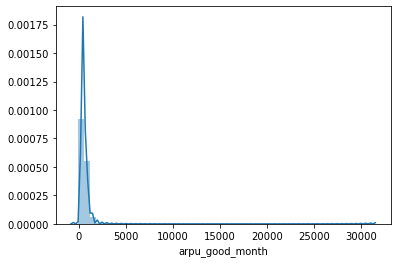

In [172]:
univariate_analysis(df.arpu_good_month)

In [173]:
pd.crosstab(df.churn, df.night_pck_user_8, normalize='columns')*100


night_pck_user_8      -1.0        0.0        1.0
churn                                           
0                 85.89123  97.117602  97.360704
1                 14.10877   2.882398   2.639296

In [174]:
pd.crosstab(df.churn, df.sachet_3g_8)


sachet_3g_8     0     1    2    3    4   5   6   7   8   9   ...  19  20  21  \
churn                                                        ...               
0            24972  1609  399  184  106  86  43  35  28  19  ...   1   3   3   
1             2369    48    5    8    4   2   1   0   2   0  ...   0   0   0   

sachet_3g_8  23  25  27  29  30  38  41  
churn                                    
0             2   1   1   1   2   1   1  
1             0   0   0   0   0   0   0  

[2 rows x 29 columns]

In [175]:
calls = pd.DataFrame()
calls['month 8'] = df['total_ic_mou_8'] + df['total_og_mou_8']
calls['month good'] = df['total_ic_mou_good_month'] + df['total_og_mou_good_month']
calls = calls.mean().reset_index()
calls

index           0
0     month 8  831.601744
1  month good  912.469891

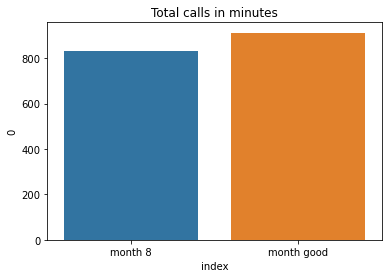

In [176]:
plt.title('Total calls in minutes')
sns.barplot(x=calls['index'], y=calls[0])
plt.show()

#### Charts show there is a decrease of around 10% in call  usage in month 8
- This verifies that the churn starts happening in month 8

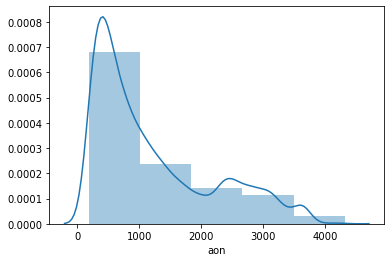

In [177]:
sns.distplot(df.aon,bins= 5)

#### Approximately 60% of users are on network for 3 years and rest all customers are in range of 3-12 years 
- Average age on network for customer is 4 years.
- Clearly, data contains mostly mature customers.

### Outlier Treatment

In [178]:
##Cap outliers in all numeric variables with k-sigma technique¶
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [179]:
# cap outliers in the numeric columns
df[num_cols] = df[num_cols].apply(cap_outliers, axis=0)

### STEP4: Model building 

In [180]:
# importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics

### Test Train split

In [181]:
# dividing data into train and test
X = df.drop("churn", axis = 1)
y = df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify = y)

### Handling class imbalance


Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

In [182]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1953
Before OverSampling, counts of label '0': 22047 

Before OverSampling, churn event rate : 8.14% 



In [183]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [184]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (44094, 133)
After OverSampling, the shape of train_y: (44094,) 

After OverSampling, counts of label '1': 22047
After OverSampling, counts of label '0': 22047
After OverSampling, churn event rate : 50.0% 



In [185]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [186]:
# fitting and transforming the scaler on train
scaled_X_train = scaler.fit_transform(X_train_res)
# transforming the train using the already fit scaler
scaled_X_test = scaler.transform(X_test)

### PCA for reducing dimensions

In [187]:
pca = PCA(random_state=32)

In [188]:
pca.fit(scaled_X_train)

PCA(random_state=32)

In [189]:
pca.components_

array([[-9.68051175e-20,  8.32667268e-17, -1.11022302e-16, ...,
        -2.49993520e-03, -6.26751770e-03,  1.38135066e-03],
       [ 8.20216889e-19, -1.11022302e-16,  3.33066907e-16, ...,
         8.83854962e-02,  4.48811587e-02,  4.89874382e-02],
       [ 4.83126061e-19, -1.38777878e-16, -2.08166817e-16, ...,
         5.04854520e-02, -3.07667785e-03,  3.67905948e-02],
       ...,
       [-0.00000000e+00,  1.00336633e-02, -6.94075847e-03, ...,
        -1.52655666e-16,  1.26634814e-16,  2.08166817e-16],
       [ 0.00000000e+00,  3.50662962e-02,  1.46694491e-01, ...,
         1.04083409e-17,  9.71445147e-17, -8.67361738e-17],
       [ 9.99994564e-01, -3.13349113e-03,  1.01908401e-03, ...,
        -1.13841228e-18,  5.33969570e-18,  3.84891771e-18]])

In [190]:
pca.explained_variance_ratio_

array([2.24964251e-01, 1.18279144e-01, 7.64621529e-02, 6.44456689e-02,
       5.15775624e-02, 4.27587066e-02, 3.38821144e-02, 2.79257656e-02,
       2.47869333e-02, 1.87260946e-02, 1.83321057e-02, 1.66022764e-02,
       1.41639974e-02, 1.30252136e-02, 1.21817849e-02, 1.13425393e-02,
       1.10680098e-02, 1.08216063e-02, 1.01743397e-02, 9.39286998e-03,
       9.10108793e-03, 8.89715119e-03, 8.39375261e-03, 8.06111554e-03,
       7.94312337e-03, 7.68943846e-03, 6.96034950e-03, 6.80491892e-03,
       6.60331506e-03, 6.49321140e-03, 6.28039168e-03, 5.42523101e-03,
       5.24523858e-03, 5.11217973e-03, 4.66870422e-03, 4.42879650e-03,
       4.24958078e-03, 4.11798500e-03, 3.47092820e-03, 3.32596425e-03,
       3.25711069e-03, 3.20020672e-03, 3.03956703e-03, 2.96987294e-03,
       2.86839636e-03, 2.70307524e-03, 2.60334436e-03, 2.37507314e-03,
       2.23702516e-03, 2.13598339e-03, 2.11073356e-03, 2.05325180e-03,
       1.96388696e-03, 1.74862030e-03, 1.71993919e-03, 1.66237375e-03,
      

In [191]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

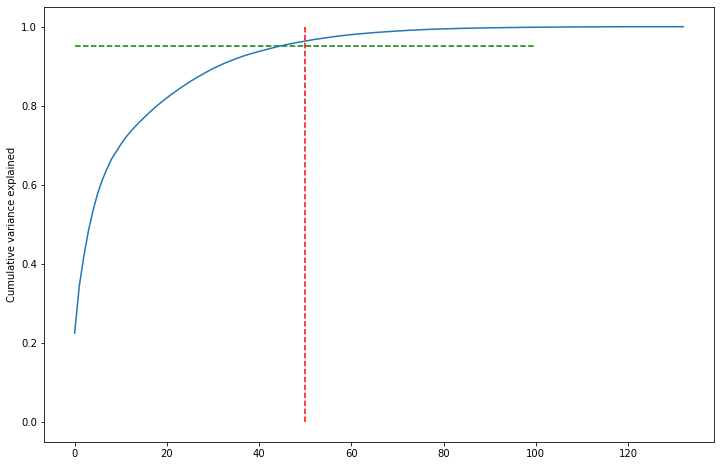

In [192]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [193]:
pca_final = IncrementalPCA(n_components=50)

In [194]:
df_train_pca = pca_final.fit_transform(scaled_X_train)

In [195]:
df_train_pca.shape

(44094, 50)

In [196]:
corrmat = np.corrcoef(df_train_pca.transpose())

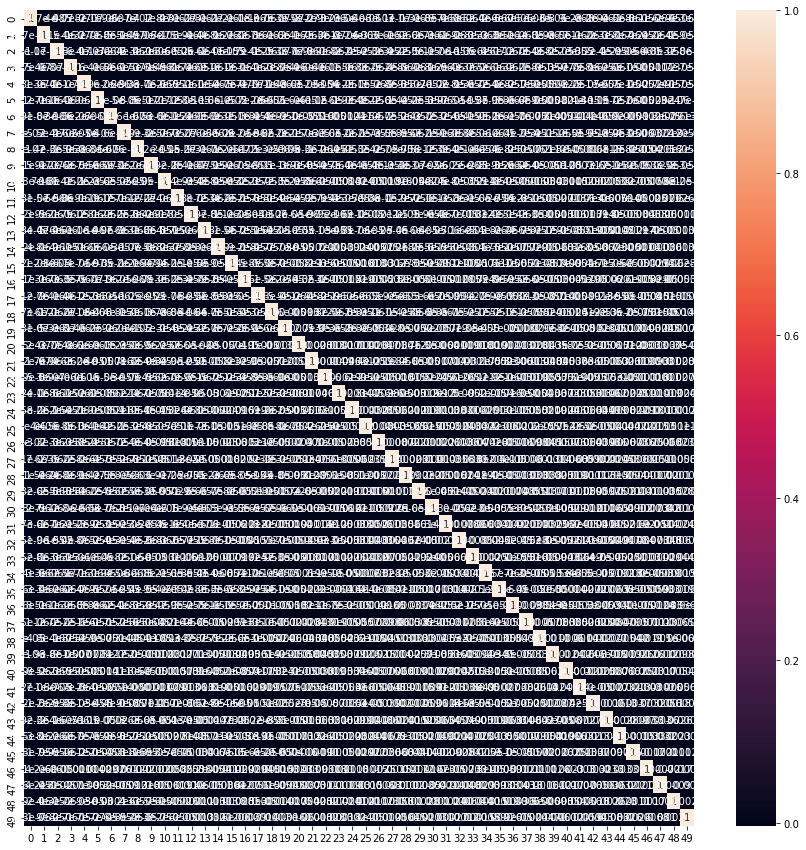

In [197]:
corrmat.shape
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

#### Transforming test data

In [198]:
df_test_pca = pca_final.transform(scaled_X_test)
df_test_pca.shape

(6001, 50)

### Applying Random forest on reduced diemensions

#### Applying random forest without tuning

In [199]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [200]:
rfc.fit(df_train_pca,y_train_res)

RandomForestClassifier(class_weight='balanced')

In [201]:
predictions = rfc.predict(df_test_pca)

In [202]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [203]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5513
           1       0.50      0.59      0.54       488

    accuracy                           0.92      6001
   macro avg       0.73      0.77      0.75      6001
weighted avg       0.93      0.92      0.92      6001



In [204]:
print(confusion_matrix(y_test,predictions))

[[5222  291]
 [ 199  289]]


In [205]:
print(accuracy_score(y_test,predictions))

0.918346942176304


### Tuning n_estimators - Number of trees in forest

In [206]:

# specify number of folds for k-fold CV
n_folds = 2

# parameters to build the model on
parameters = {'n_estimators': range(50, 100, 20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train_res)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4),
             param_grid={'n_estimators': range(50, 100, 20)}, scoring='recall')

In [207]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.767251      0.034405         0.073419        0.003260   
1       3.639544      0.062772         0.100089        0.003613   
2       4.518098      0.019886         0.120355        0.000417   

  param_n_estimators                params  split0_test_score  \
0                 50  {'n_estimators': 50}           0.819922   
1                 70  {'n_estimators': 70}           0.804953   
2                 90  {'n_estimators': 90}           0.803320   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.829644         0.824783        0.004861                1  
1           0.818124         0.811539        0.006585                2  
2           0.804064         0.803692        0.000372                3

#### 70 seems to be a good value for n_estimators

### Tuning max_depth

In [208]:
# specify number of folds for k-fold CV
n_folds = 2

# parameters to build the model on
parameters = {'max_depth': range(5, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train_res)

GridSearchCV(cv=2, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(5, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [209]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.003666      0.003968         0.135546        0.000063   
1      10.783933      0.116471         0.203731        0.003831   
2      13.740522      0.227343         0.253961        0.004239   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               5   {'max_depth': 5}           0.834354           0.844650   
1              10  {'max_depth': 10}           0.889101           0.894135   
2              15  {'max_depth': 15}           0.924207           0.928562   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.839502        0.005148                3            0.851045   
1         0.891618        0.002517                2            0.925387   
2         0.926385        0.002177                1            0.976278   

   split1_train_score  mean_train_score  std_train_score  
0            0.844196          0.847621         0.003425  
1            0.922121          0.923754         0.001633  
2            0.975552          0.975915         0.000363

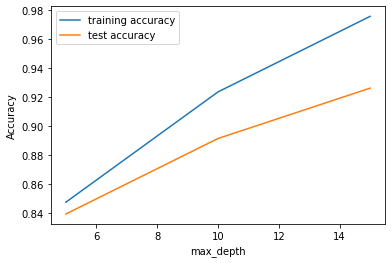

In [210]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 12 seems to be a good max depth

### Tuning max features

In [211]:

# specify number of folds for k-fold CV
n_folds = 2

# parameters to build the model on
parameters = {'max_features': [5,10,15]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train_res)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4),
             param_grid={'max_features': [5, 10, 15]}, return_train_score=True,
             scoring='accuracy')

In [212]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.638206      0.030281         0.122699        0.000848   
1       6.746172      0.008711         0.126251        0.001970   
2      10.029855      0.052209         0.130634        0.004230   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.819068   
1                 10  {'max_features': 10}           0.820656   
2                 15  {'max_features': 15}           0.817299   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.835987         0.827528        0.008459                1   
1           0.831496         0.826076        0.005420                2   
2           0.830045         0.823672        0.006373                3   

   split0_train_score  split1_train_score  mean_train_score  std_train_score  
0            0.836032            0.832630          0.834331         0.001701  
1            0.833674            0.826280          0.829977         0.003697  
2            0.829546            0.826462          0.828004         0.001542

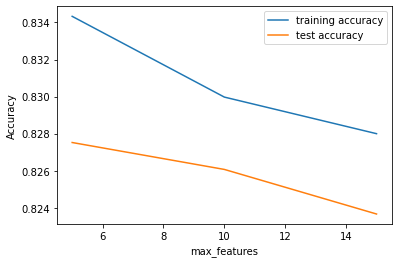

In [213]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### 10 seems to be good param for max_features

### Tuning min sample leaf

In [214]:
# specify number of folds for k-fold CV
n_folds = 2

# parameters to build the model on
parameters = {'min_samples_leaf': [50, 100, 200, 400]}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train_res)

GridSearchCV(cv=2, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': [50, 100, 200, 400]},
             return_train_score=True, scoring='accuracy')

In [215]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.155398      0.158090         0.229418        0.000872   
1      10.359468      0.196468         0.206845        0.003587   
2       8.975515      0.075324         0.191730        0.006263   
3       7.376585      0.107559         0.166372        0.000239   

  param_min_samples_leaf                     params  split0_test_score  \
0                     50   {'min_samples_leaf': 50}           0.862249   
1                    100  {'min_samples_leaf': 100}           0.846873   
2                    200  {'min_samples_leaf': 200}           0.832267   
3                    400  {'min_samples_leaf': 400}           0.825373   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.873770         0.868009        0.005760                1   
1           0.859709         0.853291        0.006418                2   
2           0.845829         0.839048        0.006781                3   
3           0.834807         0.830090        0.004717                4   

   split0_train_score  split1_train_score  mean_train_score  std_train_score  
0            0.888738            0.884111          0.886424         0.002313  
1            0.869506            0.862158          0.865832         0.003674  
2            0.849685            0.843289          0.846487         0.003198  
3            0.839751            0.830181          0.834966         0.004785

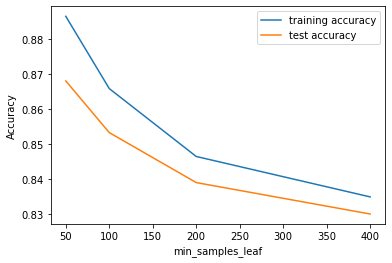

In [216]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 200 seems to be a good param for min sample leaf

### Tuning min samples split

In [217]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 2

# parameters to build the model on
parameters = {'min_samples_split': [200, 400, 1600, 6400]}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train_res)

GridSearchCV(cv=2, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': [200, 400, 1600, 6400]},
             return_train_score=True, scoring='accuracy')

In [218]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.368579      0.818538         0.237276        0.001077   
1      13.551911      0.346426         0.210594        0.002864   
2       9.327095      0.599571         0.167941        0.003170   
3       4.617895      0.200047         0.122213        0.002002   

  param_min_samples_split                       params  split0_test_score  \
0                     200   {'min_samples_split': 200}           0.858530   
1                     400   {'min_samples_split': 400}           0.843380   
2                    1600  {'min_samples_split': 1600}           0.814170   
3                    6400  {'min_samples_split': 6400}           0.794847   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.872726         0.865628        0.007098                1   
1           0.857577         0.850479        0.007098                2   
2           0.829410         0.821790        0.007620                3   
3           0.818343         0.806595        0.011748                4   

   split0_train_score  split1_train_score  mean_train_score  std_train_score  
0            0.889101            0.885291          0.887196         0.001905  
1            0.867420            0.860162          0.863791         0.003629  
2            0.834127            0.822924          0.828525         0.005602  
3            0.810405            0.809316          0.809861         0.000544

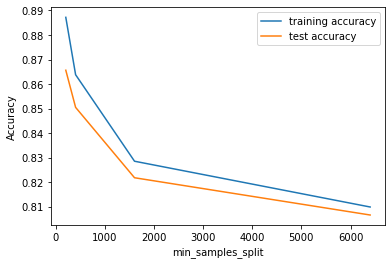

In [219]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 400 seems to be a good param for min_samples_split

**Fitting the final model with the best parameters obtained from grid search.**

In [220]:
# model with the best hyperparameters
rfc = RandomForestClassifier(
                            class_weight='balanced',
                            bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=200, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=60)

In [221]:
# fit
rfc.fit(df_train_pca,y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=10,
                       min_samples_leaf=200, min_samples_split=400,
                       n_estimators=60)

In [222]:
# predict
predictions = rfc.predict(df_test_pca)

In [223]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5513
           1       0.35      0.76      0.48       488

    accuracy                           0.87      6001
   macro avg       0.66      0.82      0.70      6001
weighted avg       0.93      0.87      0.89      6001



In [224]:
cm = confusion_matrix(y_test,predictions)
cm

array([[4821,  692],
       [ 118,  370]])

In [225]:

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


Sensitivity: 	0.76
Specificity: 	0.87


In [226]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,predictions)))
print("Recall : {}".format(metrics.recall_score(y_test,predictions)))
print("Precision : {}".format(metrics.precision_score(y_test,predictions)))

Accuracy : 0.8650224962506249
Recall : 0.7581967213114754
Precision : 0.3483992467043315


### PCA with Logistic regression

In [227]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic = LogisticRegression(class_weight='balanced')

In [228]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [56, 74], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [229]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   30.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [56, 74]},
             scoring='roc_auc', verbose=1)

In [230]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.909026      0.025544         0.000000        0.000000   
1        1.087336      0.040146         0.000000        0.000000   
2        1.409116      0.022057         0.037487        0.004281   
3        1.695323      0.036260         0.045137        0.003980   
4        0.858820      0.018558         0.000000        0.000000   
5        1.155917      0.060870         0.000000        0.000000   
6        1.691459      0.065487         0.038799        0.002133   
7        1.862451      0.059794         0.057394        0.023234   
8        0.967869      0.041871         0.000000        0.000000   
9        1.085044      0.029965         0.000000        0.000000   
10       1.525609      0.055322         0.038103        0.004289   
11       1.728973      0.024853         0.046156        0.005356   
12       0.891105      0.031423         0.000000        0.000000   
13       1.086661      0.010832         0.000000        0.000000   
14       1.504007      0.028154         0.041352        0.002491   
15       1.823819      0.059446         0.043736        0.002427   
16       0.963634      0.026200         0.000000        0.000000   
17       1.235263      0.017527         0.000000        0.000000   
18       1.636581      0.048997         0.039507        0.003218   
19       1.833871      0.024941         0.048070        0.005833   
20       0.905096      0.006331         0.000000        0.000000   
21       1.138292      0.076348         0.000000        0.000000   
22       1.736934      0.039835         0.046254        0.004446   
23       1.928655      0.070640         0.044424        0.003731   
24       0.904500      0.014953         0.000000        0.000000   
25       1.117541      0.017217         0.000000        0.000000   
26       1.514633      0.023477         0.039723        0.001868   
27       1.776400      0.041690         0.045405        0.006282   
28       0.874412      0.011302         0.000000        0.000000   
29       1.106274      0.025023         0.000000        0.000000   
30       1.512091      0.043141         0.038048        0.005852   
31       1.377774      0.247086         0.023632        0.005718   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      56   
1                0.1                      l1                      74   
2                0.1                      l2                      56   
3                0.1                      l2                      74   
4                0.5                      l1                      56   
5                0.5                      l1                      74   
6                0.5                      l2                      56   
7                0.5                      l2                      74   
8                  1                      l1                      56   
9                  1                      l1                      74   
10                 1                      l2                      56   
11                 1                      l2                      74   
12                 2                      l1                      56   
13                 2                      l1                      74   
14                 2                      l2                      56   
15                 2                      l2                      74   
16                 3                      l1                      56   
17                 3                      l1                      74   
18                 3                      l2                      56   
19                 3                      l2                      74   
20                 4                      l1                      56   
21                 4                      l1                      74   
22                 4                      l2                      56   
23                 4           

In [231]:
# printing best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8814513382841465
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2', 'pca__n_components': 74}


### Evaluation on test data

In [232]:

# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3083 2430]
 [  26  462]]
Sensitivity: 	0.95
Specificity: 	0.56
AUC:    	 0.89


In [233]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall : {}".format(metrics.recall_score(y_test,y_pred)))
print("Precision : {}".format(metrics.precision_score(y_test,y_pred)))

Accuracy : 0.5907348775204133
Recall : 0.9467213114754098
Precision : 0.15975103734439833


#### Overall Random forest model is more stable for predicting but both the models have sufficiently high recall which should be the criteria here as we do not want any churns to get missed. We may classify a non churn as churn but target is to not miss any churn customer.

## Model 2 for interpretability

In [234]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [235]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5513
           1       0.67      0.54      0.60       488

    accuracy                           0.94      6001
   macro avg       0.82      0.76      0.78      6001
weighted avg       0.94      0.94      0.94      6001



In [236]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_default)))
print("Recall : {}".format(metrics.recall_score(y_test,y_pred_default)))
print("Precision : {}".format(metrics.precision_score(y_test,y_pred_default)))

[[5385  128]
 [ 226  262]]
Accuracy : 0.9410098316947175
Recall : 0.5368852459016393
Precision : 0.6717948717948717


In [237]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train.columns[1:])
features.append('churn')

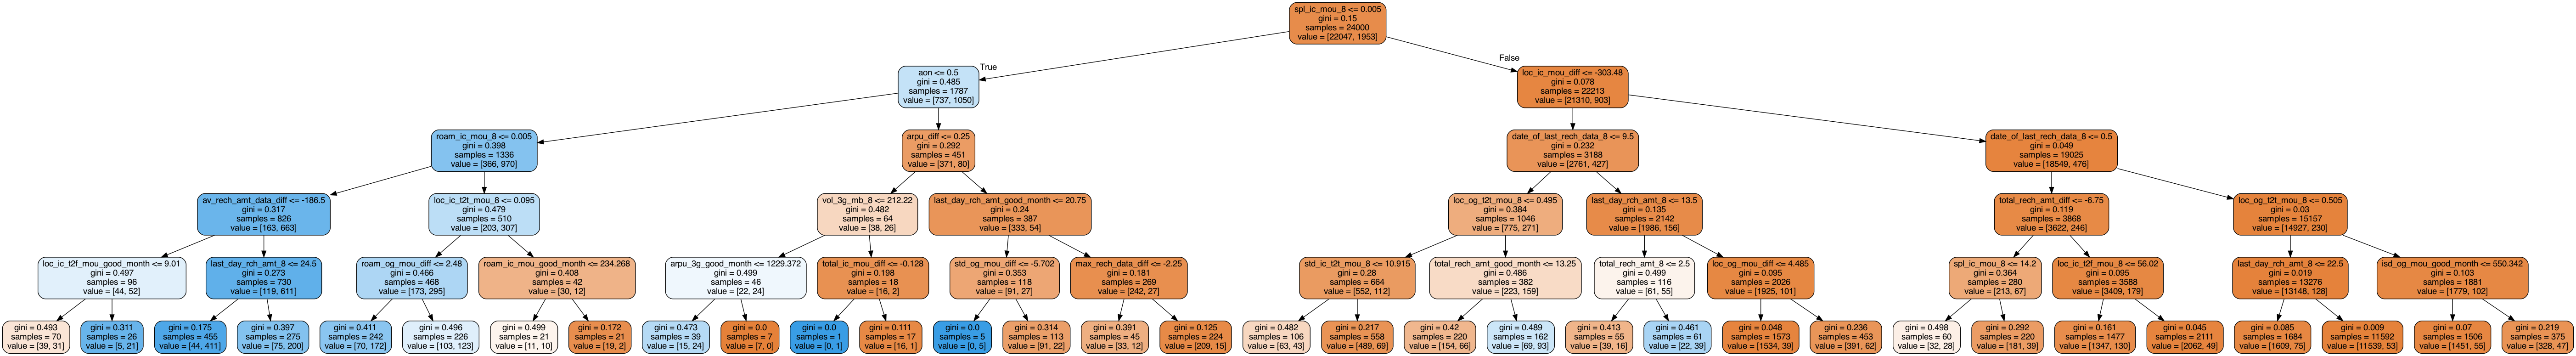

In [238]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Tuning parameters of decision tree

In [239]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [240]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

**Running the model with best parameters obtained from grid search.**

In [241]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [242]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9418430261623063

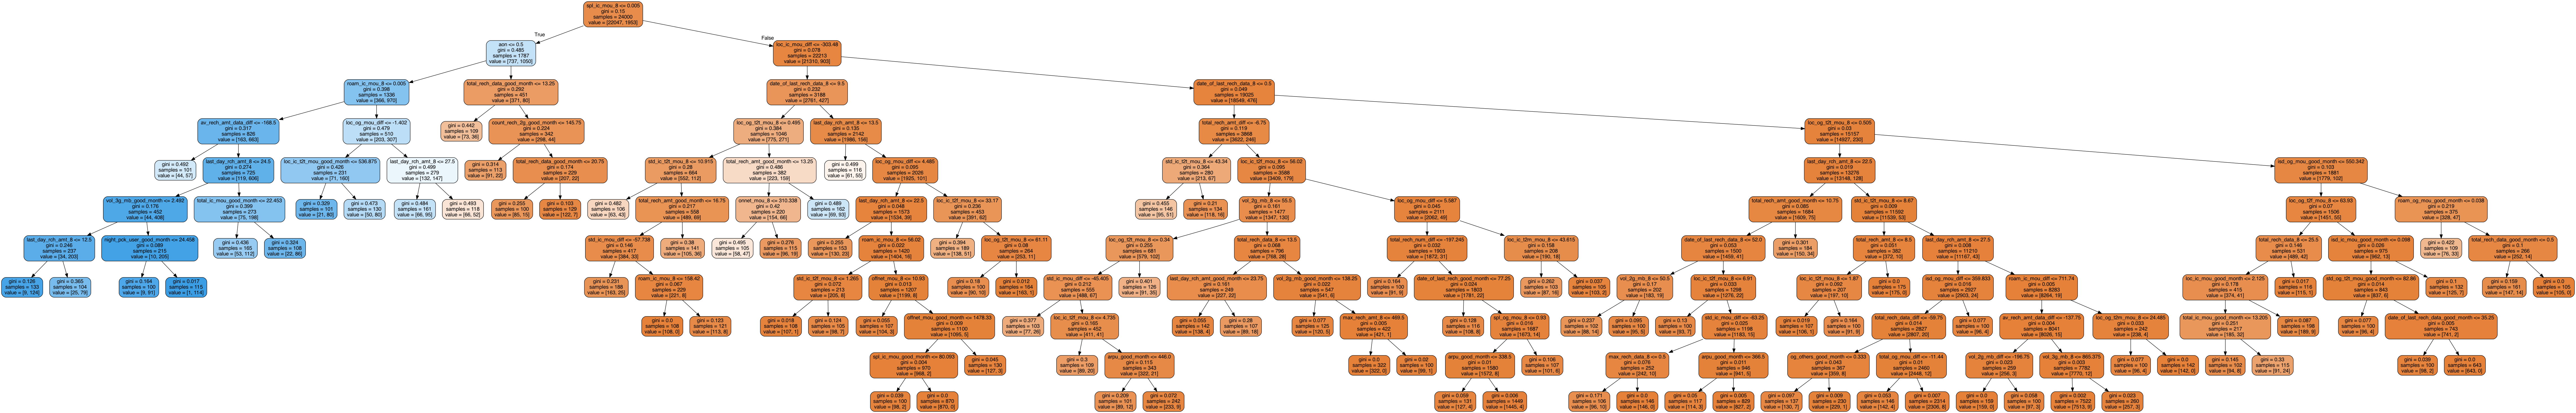

In [243]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Important variables that is representative of churn interpretted from the decision tree

**These are the factors that indicates churn**
- If the last recharge made in the action month is less than 12.5 (very low)
- std_ic_mou_diff - If difference in incoming STD calls is more than 50 minutes between average of 6,7 months and 8th month.
- roam_ic_mou_8 - Roaming incoming calls in action month is less than 160 minutes
- roam_og_mou_8 - Roaming outgoing calls are less than 25 minutes
- vol_2g_mb_8 - 2g usage is less than 50 MB in 8th month
- total_rech_num_diff - Number of recharge are decreased by 15 in the 8th month
- vol_3g_mb_8 - 3G usage is less than 1 GB in the 8th month
- total_rech_num_8 - No or just 1 recharge is made in the 8th month
- roam_og_mou_diff - Churners show higher roaming usage than non-churners


#### Conclusion

- If the number of recharges made in the action month - 8th month drops by 15, such customer should be targetted specifically for marketing
- If 3G usage in action month is less than 1GB, it is possible user is planning to move to another network
- Last recharge made in the action month is very low. It indicates that user is not planning to use the service for a very long time and is already in talks with other operators.
- If number of recharges user make is decreased by around 15, it is a good indicator, customer is not happy with the service.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- Telecom companies need to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.